In [5]:
import pandas as pd
import numpy as np
from bs4 import BeautifulSoup
from urllib.request import urlopen
import urllib
import time

In [6]:
import re

REGEX_INRTO = "고객님은 \w\w님과 \d+년 \d+월 \d+일부터 총 \d+개의 메세지를 주고 받았습니다. \n+"
REGEX_NEWLINE = "\n"
REGEX_DATE = "\d\d\d\d년 \d+월 \d+일 [월화수목금토일]요일"
REGEX_TIME = "\w\w \d+:\d+, "
REGEX_NAME = "\w\w : "
REGEX_LAUGH = "ㅋ+"
REGEX_CRY = "[ㅠㅜ]+"
REGEX_URL = "http[s]?:\/\/(?:[a-zA-Z]|[0-9]|[$\-@\.&+:\/?=]|[!*\(\),]|(?:%[0-9a-fA-F][0-9a-fA-F]))+"
REGEX_SEARCH = "샵검색 : #"


with open("messages.txt", "r") as f:
    message = f.read()
    
REGEX = '|'.join(
    [REGEX_INRTO,
     REGEX_DATE,
     REGEX_TIME,
     REGEX_LAUGH,
     REGEX_CRY,
     REGEX_URL,
     REGEX_SEARCH,])

result = re.sub(REGEX, '', message)
print(result)

# messages.txt
#고객님은 길순님과 2022년 10월 16일부터 총 24893개의 메세지를 주고 받았습니다. 
#
#
#
#
#2021년 12월 14일 화요일
#오전 11:01, 길동 : 안녕하세요~ 인천대학교 보드게임동아리
#마니또의 요정입니다🧞‍♀️
#2021 보인다 엠티 마니또 배정 결과를 발표합니다!
#오후 11:01, 길동 : 동영상
#오후 11:33, 길순 : 어마아앗
#오후 11:33, 길순 : 마니또인가요? ^^


﻿
지희 : 안녕하세요~ 인천대학교 보드게임동아리
마니또의 요정입니다🧞‍♀️
2021 보인다 엠티 마니또 배정 결과를 발표합니다!
지희 : 동영상
태호 : 어마아앗
태호 : 마니또인가요? ^^
지희 : 🧞‍♀️ 🧞‍♀️ 🧞‍♀️
태호 : 혜미횐님 ^^
태호 : 확인했습니다
태호 : 저에게 너무 높은 분이
태호 : 마니또인거 아닌가요?
지희 : 랜덤 잘못 돌린 네이버를 탓하시면 됩니다
태호 : 아이구~~
태호 : 알겠습니다~
지희 : 아무튼 즐거운 엠티 되세요~🧞‍♀️
태호 : 고생이 많으십니다
태호 : 네 ^^



태호 : 지희 횐님
태호 : 혹시 이번 회의는 참여 불가하신가요?
지희 : 네네 불가능합니다
지희 : 생일때문에 풀로 약속이 잡혀서요 다음 회의때 참여하겠습니다
태호 : 아이구 
태호 : 네 그러면 잘 다녀오세요!!
즐거운 연초 되시길~~~
지희 : 네네! 새해 복 많이 받으세요~



태호 : 지희 횐님
지희 : 이모티콘 
지희 : 무슨 일이신가요??
태호 : 그거그거
태호 : 총무 하실지말지
태호 : 물어보려구
태호 : 왔습니다
지희 : 꽤 중요한 역할이라구 들었읍니다...
태호 : 아주...
태호 : 중요하지요...
지희 : 마이깟...
태호 : 이제또
태호 : 그런자리에
태호 : 지희횐님이
태호 : 기가막히시지 않나...
지희 : 우와...
지희 : 횐님께서 그렇게 말해주시니
지희 : 또 고민이 되는군요
태호 : ㅎㅎ...
지희 : 총무가 어떤 일을 하는지
지희 : 다시 한 번 확인해보려고 하는데
태호 : 네
지희 : 톡방에 뭐라구 검색하면 나올까요??
태호 : 지난 12월 운영진 회의때
태호 : 이야기를
태호 : 제가 캡처해 드릴게요
태호 : 잠시만 기다려주세요
지희 : 와아!!!
태호 : 사진
태호 : 이 부분이고
태호 : 인수인계는
태호 : 지난번에 총무였던 명석이 형이 있으니까
태호 : 명석이 형에게 물어보면 될거에요
지희 : 제가 하겠읍니다
태호 : 엄허나
지희 : 이모티콘 
태호 : 횐님...
태호 : 강하시군요
지희 : 쏘쓰윗~

In [7]:
# 대화량
talk_user1 = result.count('태호 : ')
talk_user2 = result.count('지희 : ')
rate_talk_user1 = round(talk_user1/(talk_user1+talk_user2)*100, 2)
rate_talk_user2 = round(talk_user2/(talk_user1+talk_user2)*100, 2)

print(f"지금까지 누가 말을 더 많이 했냐면...\n 태호: {talk_user1}({rate_talk_user1}%) 지희: {talk_user2}({rate_talk_user2}%)\n")

# 누가 끼끼 소리를 내었는가?
pattern = re.compile(r"끼{2,}")

kkikki_user1 = len(re.findall(r"태호 : .*끼{2,}.*", message))
kkikki_user2 = len(re.findall(r"지희 : .*끼{2,}.*", message))
rate_kkikki_user1 = round(kkikki_user1/(kkikki_user1+kkikki_user2)*100, 2)
rate_kkikki_user2 = round(kkikki_user2/(kkikki_user1+kkikki_user2)*100, 2)

print(f'누가 끼끼 소리를 내었는가?\n 태호: {kkikki_user1}({rate_kkikki_user1}%) 지희: {kkikki_user2}({rate_kkikki_user2}%)\n')

# 누가 아잉 소리를 내었는가?
aaing_user1 = len(re.findall(r"태호 : .*아잉.*", message))
aaing_user2 = len(re.findall(r"지희 : .*아잉.*", message))
rate_aaing_user1 = round(aaing_user1/(aaing_user1+aaing_user2)*100, 2)
rate_aaing_user2 = round(aaing_user2/(aaing_user1+aaing_user2)*100, 2)

print(f'누가 아잉 소리를 내었는가?\n 태호: {aaing_user1}({rate_aaing_user1}%) 지희: {aaing_user2}({rate_aaing_user2}%)\n')

지금까지 누가 말을 더 많이 했냐면...
 태호: 30458(46.16%) 지희: 35522(53.84%)

누가 끼끼 소리를 내었는가?
 태호: 81(26.3%) 지희: 227(73.7%)

누가 아잉 소리를 내었는가?
 태호: 853(55.86%) 지희: 674(44.14%)



In [8]:
# from konlpy.tag import Okt
# okt = Okt()
result = re.sub(REGEX_NAME, '', result)

ko_doc_noun = result.split()

from collections import Counter

count_noun = Counter(ko_doc_noun)

In [11]:
stopword_list = ['이모티콘', 'GIF', 'SELFIE', '사진', 'IMAGE', 'STICKER', 'VIDEO']

for word in count_noun:
    if len(word) == 1: # 한 글자 짜리도 없애는 게 더 예쁘게 나온다.
        stopword_list.append(word)
        
#stopword_list[-5:]

for stopword in stopword_list:
    if stopword in count_noun:
        count_noun.pop(stopword)

count_noun.most_common(50)

[('아잉', 1103),
 ('태호~', 906),
 ('태호', 818),
 ('햄무는', 687),
 ('햄무', 573),
 ('누나', 496),
 ('근데', 469),
 ('우웅', 454),
 ('태호~~', 429),
 ('응응', 409),
 ('허억', 406),
 ('그러면', 286),
 ('태호는', 277),
 ('지금', 270),
 ('응~', 263),
 ('햄무가', 251),
 ('나는', 250),
 ('오늘', 248),
 ('누나~', 248),
 ('누나가', 240),
 ('그래서', 234),
 ('사랑해', 213),
 ('이제', 211),
 ('태호가', 204),
 ('하고', 194),
 ('아잉><', 190),
 ('내가', 188),
 ('그리고', 185),
 ('너무', 175),
 ('그랭', 175),
 ('햄무도', 170),
 ('냅다', 166),
 ('가아', 159),
 ('응웅', 155),
 ('마쟈', 154),
 ('끼끼끼끼', 151),
 ('그냥', 147),
 ('일단', 142),
 ('내일', 141),
 ('사실', 141),
 ('거야~', 135),
 ('아잉~', 134),
 ('ㅇㅇ', 128),
 ('같이', 127),
 ('와아', 121),
 ('마쟈~', 121),
 ('아니', 120),
 ('아아', 118),
 ('아무튼', 116),
 ('태호도', 113)]

In [12]:
from wordcloud import WordCloud
import numpy as np
from PIL import Image

#count_noun = dict(count_noun)
#type(dict(count_noun)) # generate_from_frequencies 는 딕셔너리 타입을 받는다.

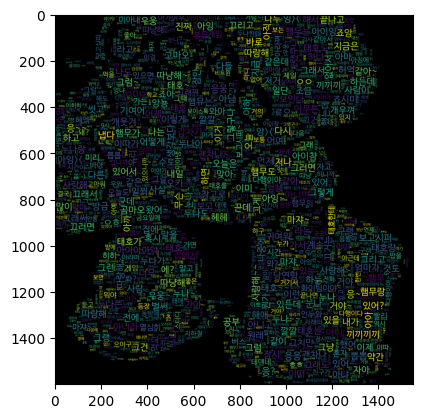

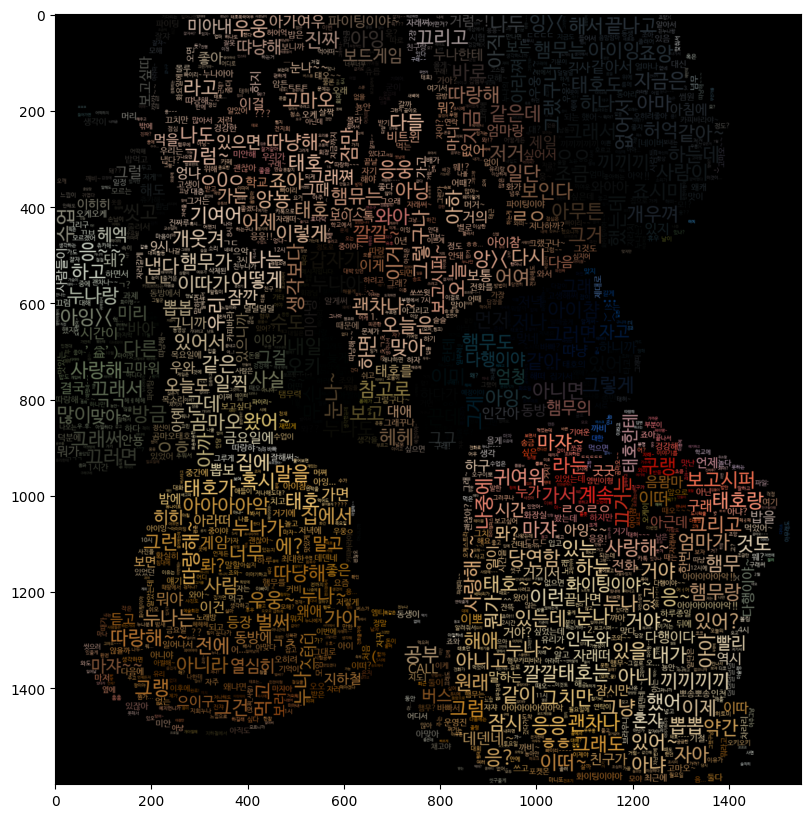

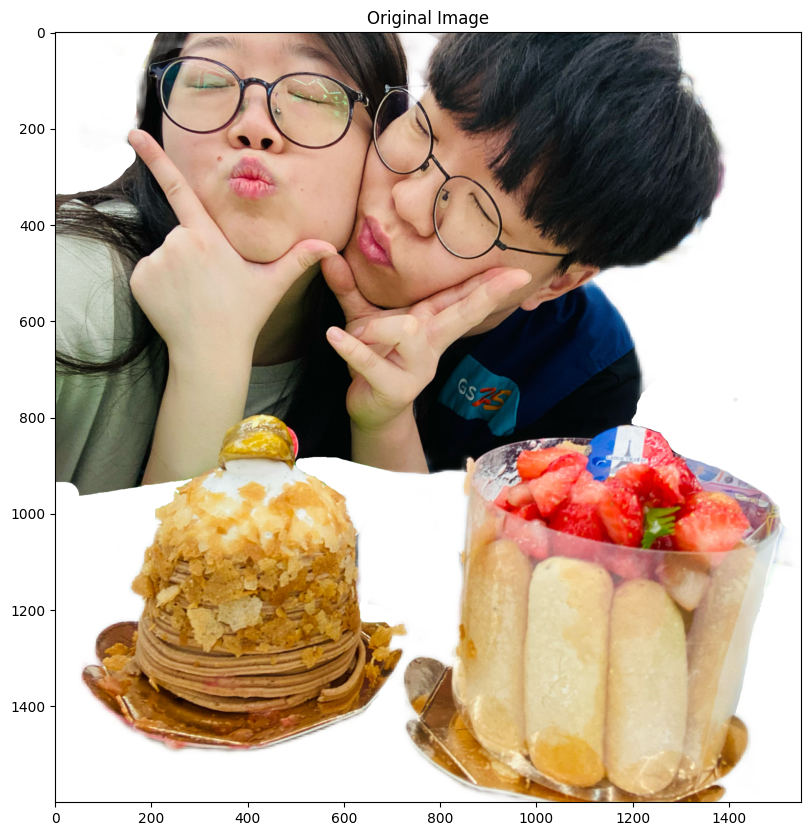

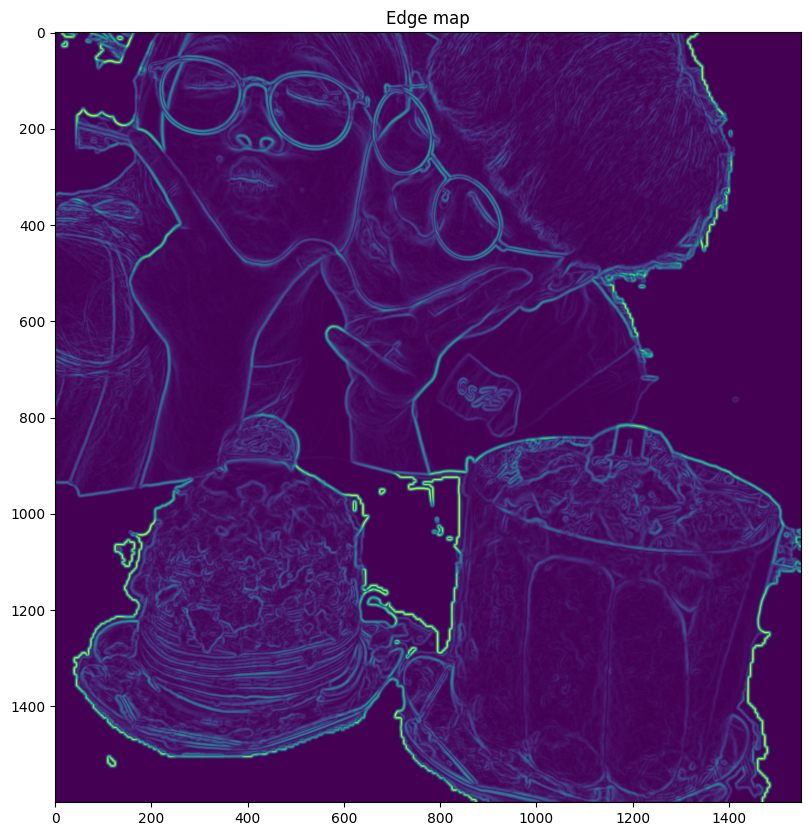

In [13]:
import os
from PIL import Image

import numpy as np
import matplotlib.pyplot as plt
from scipy.ndimage import gaussian_gradient_magnitude

from wordcloud import WordCloud, ImageColorGenerator

# get data directory (using getcwd() is needed to support running example in generated IPython notebook)
d = os.path.dirname(__file__) if "__file__" in locals() else os.getcwd()

# load wikipedia text on rainbow
text = count_noun
#text = open(os.path.join(d, 'wiki_rainbow.txt'), encoding="utf-8").read()

# load image. This has been modified in gimp to be brighter and have more saturation.
oort_cloud_color = np.array(Image.open(os.path.join(d, "background.png")))
# subsample by factor of 3. Very lossy but for a wordcloud we don't really care.
oort_cloud_color = oort_cloud_color[::1, ::1]

# create mask  white is "masked out"
oort_cloud_mask = oort_cloud_color.copy()
oort_cloud_mask[oort_cloud_mask.sum(axis=2) == 0] = 255

# some finesse: we enforce boundaries between colors so they get less washed out.
# For that we do some edge detection in the image
edges = np.mean([gaussian_gradient_magnitude(oort_cloud_color[:, :, i] / 255., 2) for i in range(3)], axis=0)
oort_cloud_mask[edges > .06] = 255

# create wordcloud. A bit sluggish, you can subsample more strongly for quicker rendering
# relative_scaling=0 means the frequencies in the data are reflected less
# acurately but it makes a better picture
wc = WordCloud(max_words=2000, font_path='/Library/Fonts/NanumBarunGothic.ttf', mask=oort_cloud_mask, max_font_size=40, random_state=42, relative_scaling=0)

# generate word cloud
wc.generate_from_frequencies(text)
#wc.generate(text)
plt.imshow(wc) # 이제 여기에 색을 입힐 거야!

# create coloring from image
image_colors = ImageColorGenerator(oort_cloud_color)
wc.recolor(color_func=image_colors)
plt.figure(figsize=(10, 10))
plt.imshow(wc, interpolation="bilinear")
wc.to_file("oort_cloud.png")

plt.figure(figsize=(10, 10))
plt.title("Original Image")
plt.imshow(oort_cloud_color)

plt.figure(figsize=(10, 10))
plt.title("Edge map")
plt.imshow(edges)
plt.show()

with open("oort_cloud.svg", "w") as text_file:
    text_file.write(wc.to_svg())